# 3 Робота з даними

## 3.1 Перевірка даних

### Імпортуємо пакет pandas, завантажимо дані в датафрейм, виводимо інформацію про нього. Видалимо колонку id за допомогою методу pandas.Dataframe.drop, передавши в нього список з єдиним елементом id та параметром за замовчуванням inplace=True, щоб зміна відбулася в самому датафреймі, а не видало новий. Додатково імпортуємо модулі matplotlib.pyplot та seaborn для відображення графіків.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/cardio_train.csv', sep=';')
df.drop(['id'], axis=1, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


*Завантажений датафрейм*

In [2]:
df.isna().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

*Колонки, де всі значення ініціалізовані*

## 3.2 Вибір ознак для аналізу

### Побудуємо матрицю кореляції та визначимо, наскільки кожен фактор впливає на якість води. Для цього імпортуємо модуль seaborn та застосуємо функцію heatmap, де передаємо йому вище зазначену матрицю, використавши pandas.Dataframe.corr метод датафрейму. 

<AxesSubplot: title={'center': 'Кореляція між факторами'}>

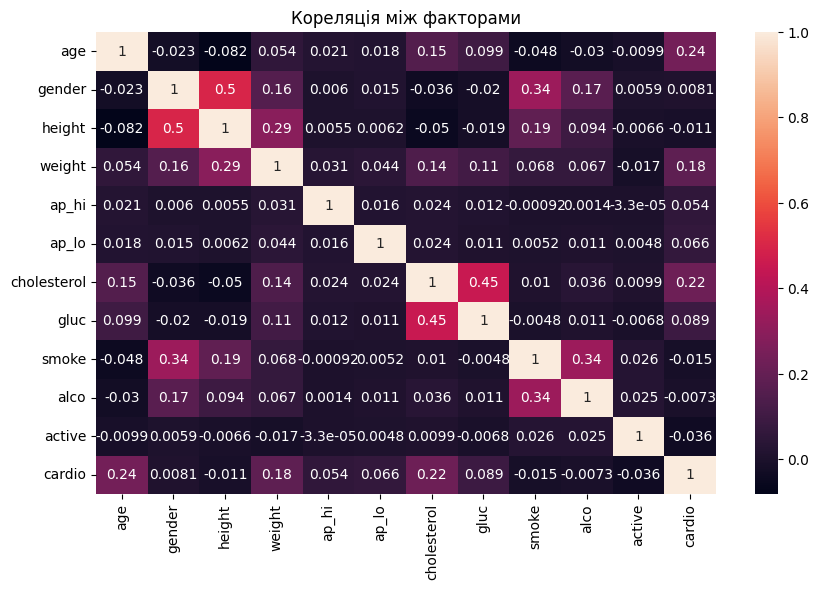

In [3]:
import seaborn as sns
fig, axis = plt.subplots(figsize=(10, 6))
axis.set_title('Кореляція між факторами')
sns.heatmap(df.corr(), ax=axis, annot=True)

*Матриця кореляцій*

### Бачимо, що найбільше на виникнення серцево-судинних захворювань впливає вік, вага, холестирол. Доволі цікавим фактами є кореляція між віком та холестиролом, статтю та курінням, статтю та алкоголем, холестиролом та глюкозою. Залежність між статтю та вагою і висотою доволі очевидна, що пояснюється звичайною різницею у фізичних показниках між чоловіком та жінокю. Зобразимо статистику факторів та винекненням захворювання, розділену за статтю. За допомогою функції seaborn.FacetGrid згрупуємо значення та за допомогою seaborn.histplot зобразимо їх у вигляді гістограми. Побудуємо статистику за віком.

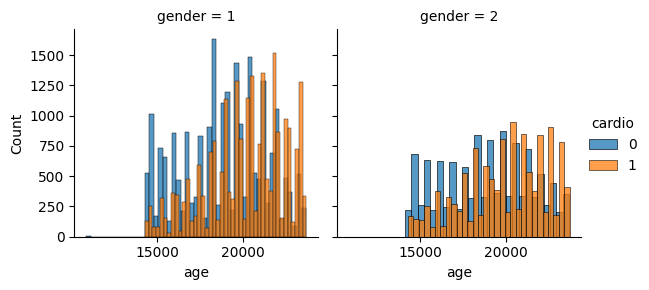

In [4]:
def plot_stat(factor: str):
    g = sns.FacetGrid(df[['gender', 'cardio'] + [factor]], col='gender', hue='cardio')
    g.map(sns.histplot, factor)
    g.add_legend()
plot_stat('age')
results = []

*Статистика захворювання від віку між чоловіками та жінками*

### Зобразимо статистику за вагою.

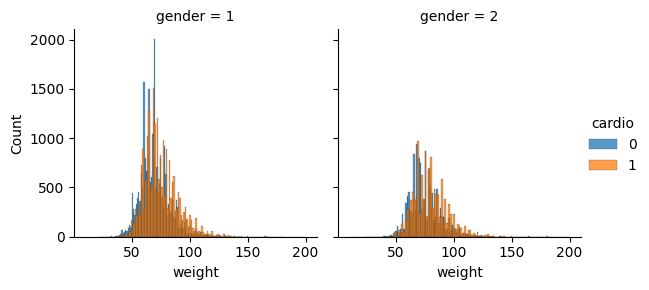

In [38]:
plot_stat('weight')

*Статистика захворювання від ваги між чоловіками та жінками*

### Зобразимо статистику за холестиролом.

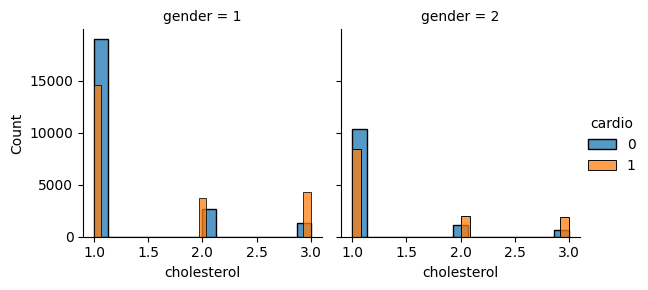

In [39]:
plot_stat('cholesterol')

*Статистика захворювання від холестиролу між чоловіками та жінками*

## 3.3 Поділ даних

### Для збільшення якості моделі залишимо лише чотири колонки: age, weight, cholesterol, cardio.

In [5]:
df = df[['age', 'weight', 'cholesterol', 'cardio']]
df

,age,weight,cholesterol,cardio
0,18393,62.0,1,0
1,20228,85.0,3,1
2,18857,64.0,3,1
3,17623,82.0,1,1
4,17474,56.0,1,0
...,...,...,...,...
69995,19240,76.0,1,0
69996,22601,126.0,2,1
69997,19066,105.0,3,1
69998,22431,72.0,1,1


*Відфільтрований датафрейм*

### Ділимо дані на тренувальні та тестові для подальшох роботи. Імпортуємо модуль sklearn.model_selection та застосуємо функцію train_test_split. Розділимо набір даних на 80% навчальних та 20% тестових.

In [6]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=0)

*Поділ інформації на інформацію та результат*

# 4 Інтелектуальний аналіз даних

## 4.1 Обґрунтування вибору методів інтелектуального аналізу даних

### Мною було обранодва методи для прогнозування а в подальшому і порівняніїх –це методи K-Nearest Neighbors та LogisticRegression.


## 4.2 Аналіз отриманих результатів для методу K-Nearest Neighbors

### Для виконання роботи методу KNN імпортуємо sklearn.neighbors.KNeighborsClassifier та sklearn.model_selection.GridSearchCV. 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

*Імпортування модулів*

### Визначимо, які варіанти параметрів найкраще вирішують дану задачу.

In [43]:
classificator = KNeighborsClassifier()
params = {'n_neighbors': range(1, 60)}
grid_search = GridSearchCV(classificator, params, cv=10, verbose=1)
grid_search.fit(x_train, y_train)
knn = grid_search.best_estimator_
knn

Fitting 10 folds for each of 59 candidates, totalling 590 fits


KNeighborsClassifier(n_neighbors=58)

*Визначення найкращого параметра*

### Натренуємо модель з найкращим параметром.

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=58)

*Тренування моделі K-Nearest Neighbors*

## Визначимо точність моделі на тренувальних та тестових даних

In [45]:
train_score = round(knn.score(x_train, y_train), 5)
test_score = round(knn.score(x_test, y_test), 5)
results.append({'method': 'knn', 'score': train_score, 'type': 'train'})
results.append({'method': 'knn', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 0.63252
Test accuracy: 0.60807


*Точність моделі K-Nearest Neighbors*

### Визначимо продуктивність роботи моделі на прикладі матриці невідповідностей. Для цього застосуємо sklearn.metrics.plot_confusion_matrix.

In [8]:
from sklearn.metrics import confusion_matrix
def conf_mat(model, x_test, y_test):
    y_predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt=".1f")
    plt.xlabel('Predicted')

*Імпортування модуля*

### Матриця має два рядки та дві колонки: перший ряд і перша колонка - це істинно позитивні значення, тобто людина здорова і модель не визначила захворювання; першмй ряд і друга колонка - хибно позитивні, тобто людина здорова, а модель сказала, що є захворювання; другий ряд і перша колонка - хибно негативні, тобто людина хвора, а модель сказала, що здорова; другий ряд і друга колонка - істинно негативні, тобто людина хвора і модель сказала, що хвора.

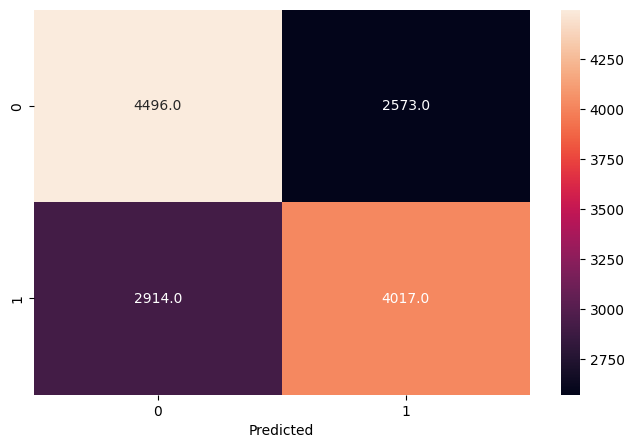

In [47]:
conf_mat(knn, x_test, y_test)

*Матриця невідповідностей для K-Nearest Neighbors*

### Побудуємо графік ROC( Receiver Operating Characteristic ), що є графіком істинно позитивної відносної частоти проти хибно позитивної частоти. Це показує компроміс між чутливістю та специфічністю. Для цього імпортуємо sklearn.metrics.roc_curve та sklearn.metrics.roc_auc_score. До того ж визначимо AUC( Area Under the ROC Curve ), що є мірою того, наскільки добре модель може розрізняти позитивні та негативні рузультати. Він коливається від 0 до 1, де 1 є найкращим класифікатором, а 0,5 – випадковим класифікатором. AUC корисний під час порівняння продуктивності різних класифікаторів на одному наборі даних, бо даж єдине число, яке підсумовує загальну продуктивність.

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
def roc(model, x_test, y_test):
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="Area = "+str(auc)+')')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc=4)
    plt.show()

*Імпортування модуля та визначення функції roc*

### Побудуємо ROC для K-Nearest Neighbors.

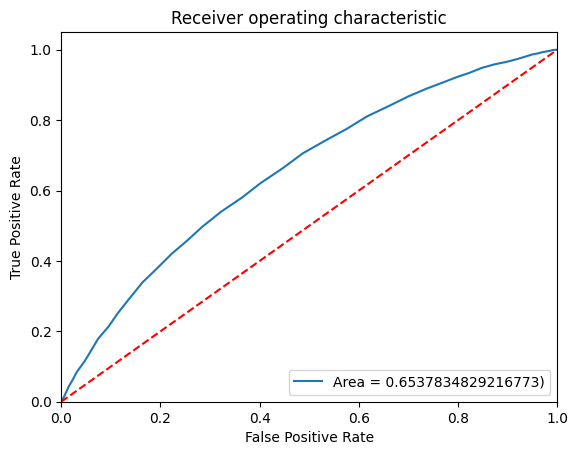

In [49]:
roc(knn, x_test, y_test)

*Графік ROC для K-Nearest Neighbors*

### У результаті бачимо, що модель має доволі помірну точність як на тренувальних у 0.632 та тестових у 0.6. З графіка ROC добре видно, що точність не найкраща і крива не достатньо викревлена в сторону одиниці.

## 4.3 Аналіз отриманих результатів для методу Logistic Regression

### Для виконання роботи методу KNN імпортуємо sklearn.linear_model.LogisticRegression; sklearn.pipeline.Pipeline для побудови пайплайну, щоб у зручному вигляді передавати параметри до декількох функцій; sklearn.preprocessing.StandardScaler для скейлингу даних до проміжку від 0 до 1. Визначимо найкращі параметри моделі, передавши в неї параметри регуляризації.

In [50]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
logisticRegr = LogisticRegression()
pipe = Pipeline(steps=[('sc', sc), ('logisticRegr', logisticRegr)])
c = np.logspace(-4, 4, 60)
penalty = ['l1', 'l2']
params = dict(logisticRegr__C=c, logisticRegr__penalty=penalty)
log_reg = GridSearchCV(pipe, params)
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('logisticRegr', LogisticRegression())]),
             param_grid={'logisticRegr__C': array([1.00000000e-04, 1.36644835e-04, 1.86718109e-04, 2.55140652e-04,
       3.48636523e-04, 4.76393801e-04, 6.50967523e-04, 8.89513497e-04,
       1.21547425e-03, 1.66088278e-03, 2.26951054e-03, 3.10116893e-03,
       4.23758716e-03, 5.79044398e-03,...
       7.60949669e+00, 1.03979842e+01, 1.42083083e+01, 1.94149195e+01,
       2.65294846e+01, 3.62511705e+01, 4.95353521e+01, 6.76875001e+01,
       9.24914728e+01, 1.26384820e+02, 1.72698329e+02, 2.35983347e+02,
       3.22459055e+02, 4.40623643e+02, 6.02089449e+02, 8.22724134e+02,
       1.12421004e+03, 1.53617495e+03, 2.09910372e+03, 2.86831681e+03,
       3.91940677e+03, 5.35566692e+03, 7.31824222e+03, 1.00000000e+04]),
                         'logisticRegr__penalty': ['l1', 'l2']})

*Тренування моделі Logistic Regression*

## Визначимо точність моделі на тренувальних та тестових даних

In [51]:
train_score = round(knn.score(x_train, y_train), 5)
test_score = round(knn.score(x_test, y_test), 5)
results.append({'method': 'logress', 'score': train_score, 'type': 'train'})
results.append({'method': 'logress', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 0.63252
Test accuracy: 0.60807


*Точність моделі Logistic Regression*

### Визначимо продуктивність роботи моделі на прикладі матриці невідповідностей.

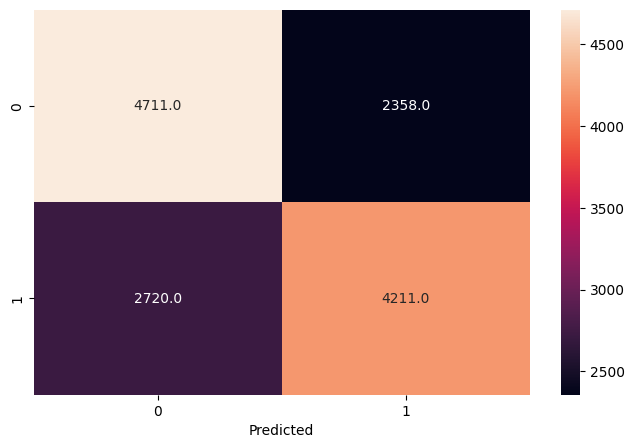

In [52]:
conf_mat(log_reg, x_test, y_test)

*Матриця невідповідностей для Logistic Regression*

### Побудуємо графік ROC для Logistic Regression.

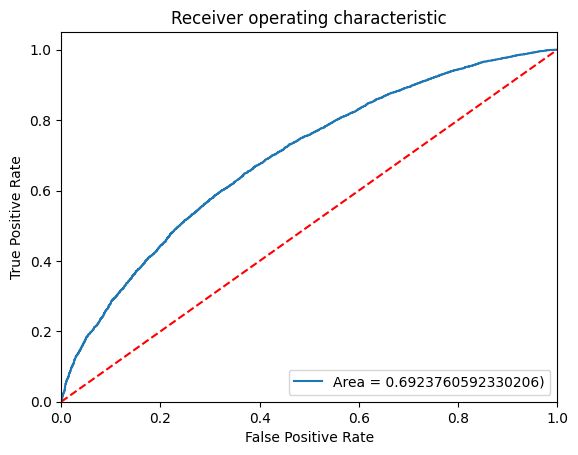

In [53]:
roc(log_reg, x_test, y_test)

*Графік ROC для Logistic Regression*

### У результаті бачимо, що точність вища ніж у KNN в обох випадках на 3-4% та пряма на ROC більш явно викревна в сторону одиниці. Отже, у даному випадку Logistic Regression працює краще за KNN.

## 4.4 Аналіз отриманих результатів для методу Random Forest

### Для виконання роботи методу KNN імпортуємо sklearn.ensemble.RandomForestClassifier. Визначимо найкращі параметри для моделі. У випадку Random Forest параметри включають кількість дерев рішень та кількість характеристик, які враховуються кожним деревом під час поділу вузла.використовуються для поділу кожного вузла, отриманого під час навчання. Імпортуємо sklearn.model_selection.RandomizedSearchCV.

In [54]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# Кількість дерев
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 60)]
params = {'n_estimators': n_estimators}
rf = RandomForestClassifier()
rf_random = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=5)
rf_random.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'n_estimators': [10, 14, 19, 24, 29, 34, 39, 44, 49,
                                          54, 59, 64, 68, 73, 78, 83, 88, 93,
                                          98, 103, 108, 113, 118, 123, 127, 132,
                                          137, 142, 147, 152, ...]})

*Тренування моделі Random Forest*

## Визначимо точність моделі на тренувальних та тестових даних

In [55]:
train_score = round(knn.score(x_train, y_train), 5)
test_score = round(knn.score(x_test, y_test), 5)
results.append({'method': 'rd_forest', 'score': train_score, 'type': 'train'})
results.append({'method': 'rd_forest', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 0.63252
Test accuracy: 0.60807


*Точність моделі Random Forest*

### Визначимо продуктивність роботи моделі на прикладі матриці невідповідностей.

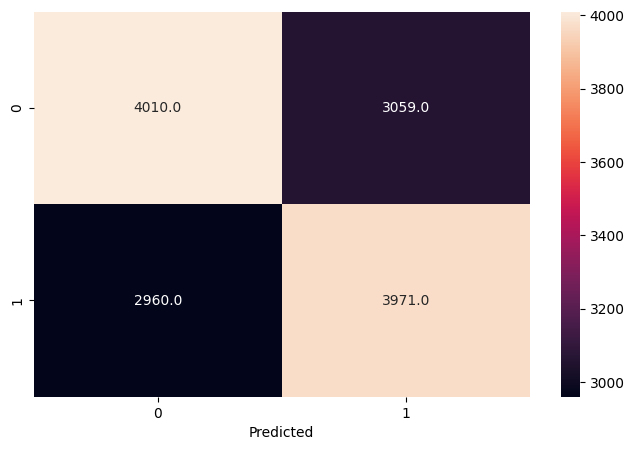

In [56]:
conf_mat(rf_random, x_test, y_test)

*Матриця невідповідностей для Random Forest*

### Побудуємо графік ROC для Logistic Regression.

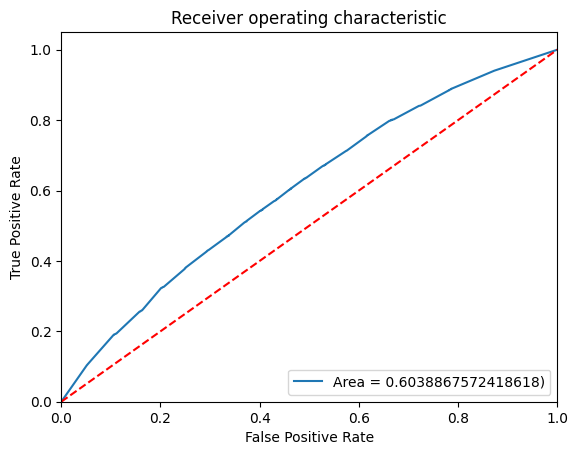

In [57]:
roc(rf_random, x_test, y_test)

*Графік ROC для Random Forest*

### З результатів бачимо надзвичайно високу точність для тренувальних даних у 0.96, однак на тестових результати гірші за попередні дві моделі і складають 0.57. Також видно, що крива більш приплюснота до червоної прямої, що наочно свідчить про гіршу точність на тестових даних, що свідчить про overfitting.

## 4.5 Аналіз отриманих результатів для методу Support Vector Machines

### Для виконання роботи методу SVM імпортуємо sklearn.svm.SVC. Визначимо найкращі параметри для моделі. Оскільки складність SVM - це O(n_samples^2 * n_features), тобто для якщо факторів 3 і 70 000 зразків, то маємо 1.47e10 ітерацій, що надзвичайно багато. Тому оберемо 1000 випадковиз зразків і отримаємо загальну кільскість ітерацій в 3e6.

In [10]:
from sklearn.svm import SVC
import numpy as np
df_svm = df.sample(n=500)
x = df_svm.iloc[:, :-1]
y = df_svm.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=0)
c = [x for x in range(10)]
params = {'C': c, 'kernel': ['rbf', 'linear']}
svc = SVC(gamma='auto', probability=True)
svc_model = GridSearchCV(svc, param_grid=params, cv=3, n_jobs=5)
svc_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_v

GridSearchCV(cv=3, estimator=SVC(gamma='auto', probability=True), n_jobs=5,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'kernel': ['rbf', 'linear']})

*Тренування моделі SVM*

## Визначимо точність моделі на тренувальних та тестових даних

In [ ]:
train_score = round(knn.score(x_train, y_train), 5)
test_score = round(knn.score(x_test, y_test), 5)
results.append({'method': 'svm', 'score': train_score, 'type': 'train'})
results.append({'method': 'svm', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 0.6675
Test accuracy: 0.61


*Точність моделі SVM*

### Визначимо продуктивність роботи моделі на прикладі матриці невідповідностей.

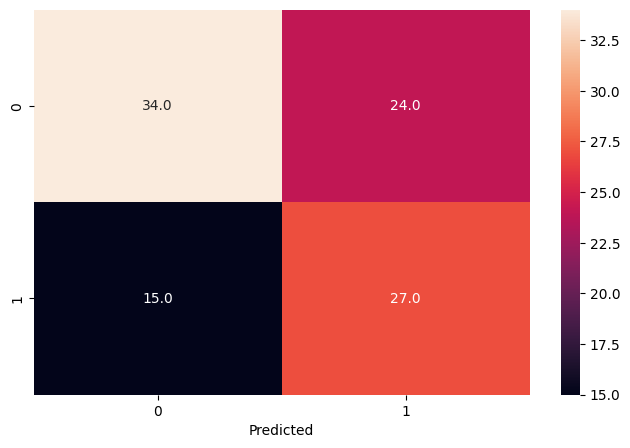

In [ ]:
conf_mat(svc_model, x_test, y_test)

*Матриця невідповідностей для SVM*

### Побудуємо графік ROC для SVM.

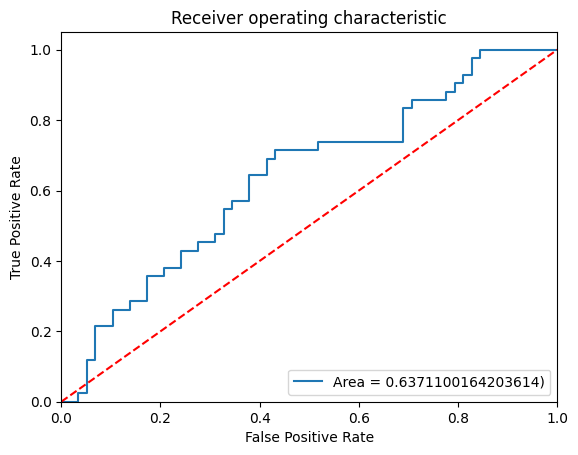

In [ ]:
roc(svc_model, x_test, y_test)

*Графік ROC для SVM*

### У результаті бачимо, що точність на ренувальних даних для SVM вища за Logistic Regression та KNN, однак суттєво гірша за Random Forest. На тестових даних показує себе приблозно однаково з Logistic Regression, KNN та краще за Random Forest. Також пряма на ROC показує, що вона не сильно викревлена в сторону одиниці.

## 4.6 Порівняння отриманих результатів методів

### Проаналізувавши окремо кожен із методів, проведемо порівнянняданих методів.

In [ ]:
df_score = pd.DataFrame(results, columns=['model','train_score','test_score'])
df_score

*Датафрейм результатів*

### Для наочності побудуємо гістограму.

In [ ]:
sns.barplot(x='method', y='score', hue='type', data=df_score)

*Результати моделей*